<a href="https://colab.research.google.com/github/UlkuTuncerKucuktas/Egg-Fracture-Detector/blob/main/egg_fracture_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

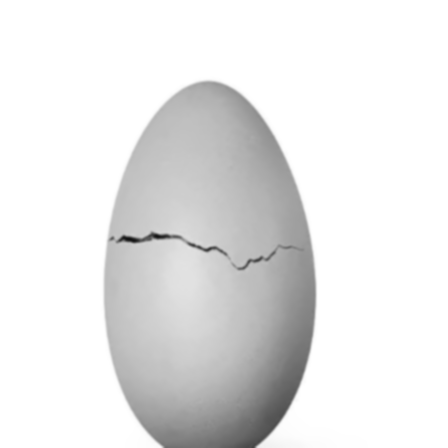

In [1]:
import cv2 
import PIL
from IPython.display import Image 
%matplotlib inline
import matplotlib.pyplot as plt


def imshow(img):
  imshow = PIL.Image.fromarray(img)
  display(imshow)

img = cv2.imread("/content/istockphoto-177700053-612x612.jpg",0)
img = cv2.resize(img,(448,448))

img = cv2.fastNlMeansDenoising(img)

img = cv2.GaussianBlur(img,(5,5),0)

img_rgb = cv2.imread("/content/istockphoto-177700053-612x612.jpg")
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
img_rgb = cv2.resize(img_rgb,(448,448))


imshow(img)

In [2]:
import numpy as np


edges = cv2.Canny(img,30,200)



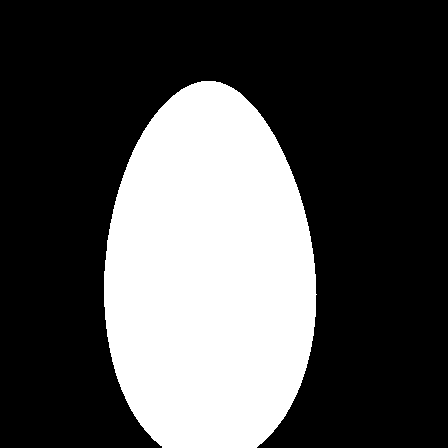

In [3]:
import numpy as np




ret3,th3 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

th3 = cv2.bitwise_not(th3)


im_floodfill = th3.copy()

h, w = th3.shape[:2]

mask = np.zeros((h+2, w+2), np.uint8)

cv2.floodFill(im_floodfill, mask, (0,0), 255)

im_floodfill_inv = cv2.bitwise_not(im_floodfill)

imagebound = cv2.bitwise_or(th3,im_floodfill_inv,mask=None)

imshow(imagebound)


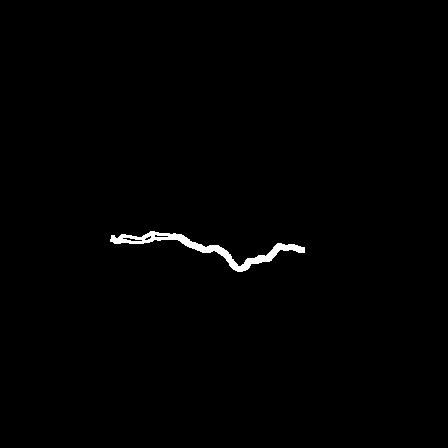

In [6]:
kernel = np.ones((3,3), np.uint8) 

img_erosion = cv2.erode(imagebound, kernel, iterations=3) 

for i in range(448):
  for j in range(448):
    if img_erosion[i][j] == 0:
      edges[i][j] = 0

edges = cv2.dilate(edges,kernel,3)
imshow(edges)

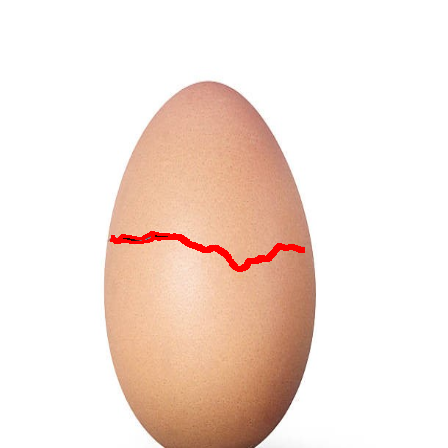

In [7]:
for i in range(448):
  for j in range(448):
    if edges[i][j] == 255:
      img_rgb[i][j] = [255,0,0]

imshow(img_rgb)